## 七月在线机器学习实训营三期第四周(数据可视化及拟合)考试
#### 考试说明:
- 起止时间：请同学在2018年3月2日至3月4日期间完成，最晚提交时间本周日（3月4日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam4后，进行作答。例如wangwei-exam4
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/4/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>赵星辰</u>  
- 批改人： David
- 最终得分:85

<center><h1>####答卷开始####</h1></center>
<hr>

## 问答题(共5题，每题4分，共计20分)

- note：
10

### 1.谈谈您对数据可视，以及其对数据分析，机器学习的意义的理解

***您的答案
数据可视化,是对数据进行分析后最直观的表达,让人更好的理解数据的特征


### 2.某评测网站对市场上某品牌充电宝随机抽取30款测得其使用寿命数据，请问哪些可视化方案适宜呈现该结果？这些方案透露出了哪些含义

***您的答案
灰度图了解使用寿命分布
箱线图了解中位数等

### 3.	一组数据的分布特征可以从哪几个方面进行描述？

***您的答案
中位数，均值，异常值等
分布,分类,线性等

### 4.（接上题）如何从可视化的角度解读一组数据的分布特征？(代码演示有额外加分)

***您的答案

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

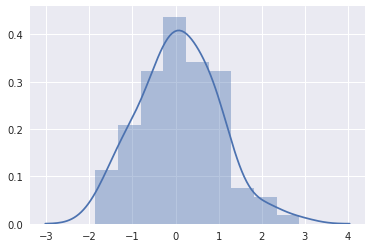

In [49]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True)

### 5.简要谈谈您对seaborn库的理解，以及有哪些较高级的用法。(代码演示有额外加分)

- note：
然而kde曲线和置信区间的演示呢？

***您的答案
不用手算KDE和置信区间,会自己生成,并且可以设置默认值(true/false)


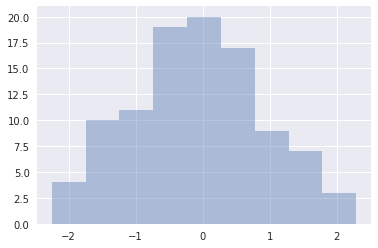

In [51]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

## 实战题(共四题，每题20分)
-note:70
#### (注意:题目均要求使用seaborn库进行)

### 1.航班乘客变化分析

- 载入相应绘图库及航班乘客数据（flights）

In [2]:
# your code
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
# np.random.seed(2017)
flights = sns.load_dataset("flights")

- 分析年度乘客总量变化情况（折线图）

In [3]:
# your code
flights.head()
grouped_by_year = flights[['year','passengers']].groupby('year').sum()

grouped_by_year.head()
# cnt_grouped_by_year = grouped_by_year.sum()

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700


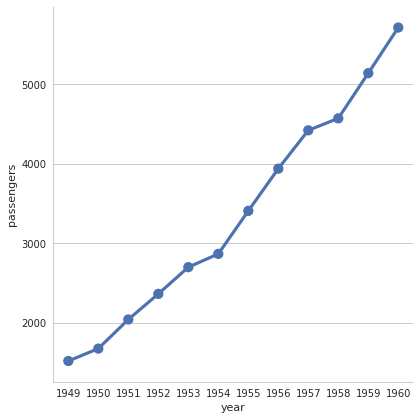

In [4]:
grouped_by_year['year'] = grouped_by_year.index
sns.factorplot(x = 'year',y = 'passengers',data = grouped_by_year,size = 6  )
# sns.set(style = "ticks")

- 分析乘客在一年中各月份的分布（柱状图）

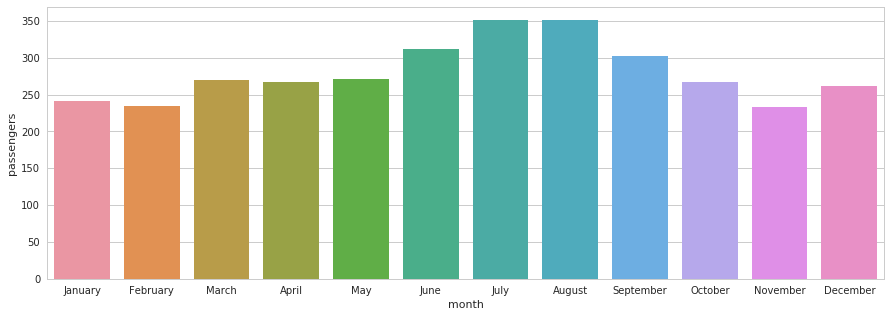

In [5]:
# your code

grouped_by_month = flights.groupby('month').mean()
# tmp.reset_index(inplace = True)
grouped_by_month['month'] = grouped_by_month.index

fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(x = "month", y = "passengers", data = grouped_by_month, ax = ax)

### 2.鸢尾花花型尺寸分析

* 载入iris数据集
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

In [6]:
# your code
# 载入iris数据集
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


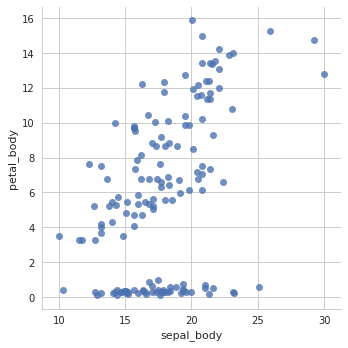

In [7]:
# 萼片（sepal）和花瓣（petal）的大小关系（散点图）
iris['sepal_body'] = iris['sepal_length'] * iris['sepal_width']
iris['petal_body'] = iris['petal_length'] * iris['petal_width']
# iris.head()
sns.lmplot(x = 'sepal_body', y = 'petal_body', data = iris, fit_reg = False)


In [8]:
# 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）


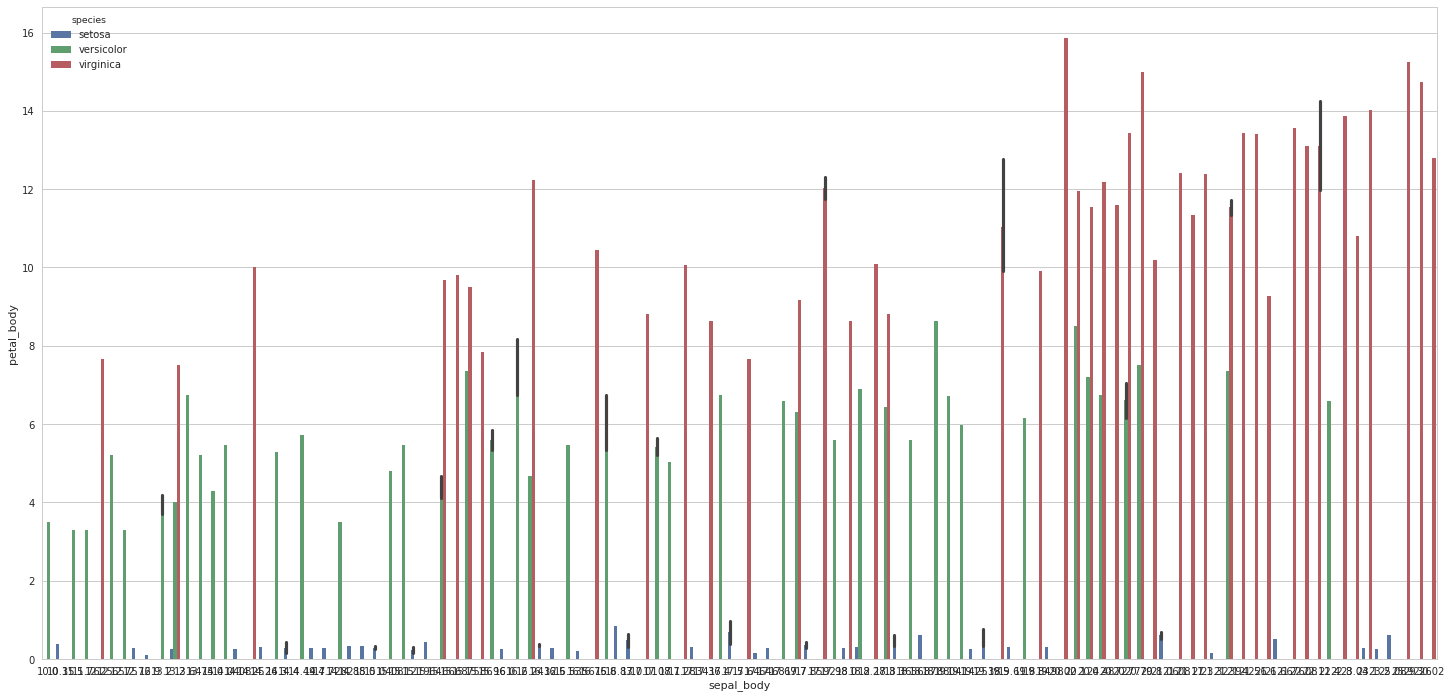

In [9]:
# 柱状图
fig, ax = plt.subplots(figsize = (25,12))
sns.barplot(x="sepal_body", y="petal_body", hue="species", data=iris)

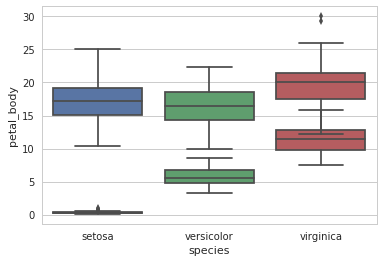

In [10]:
# 箱线图
sns.boxplot(x='species',y='sepal_body',data=iris)      #不同种类鸢尾花萼片长的分布情况      
# sns.boxplot(x='species',y='sepal_width',data=data2)       #不同种类鸢尾花萼片宽的分布情况
sns.boxplot(x='species',y='petal_body',data=iris)      #不同种类鸢尾花瓣片长的分布情况
# sns.boxplot(x='species',y='petal_width',data=data2)       #不同种类鸢尾花瓣片宽的分布情况

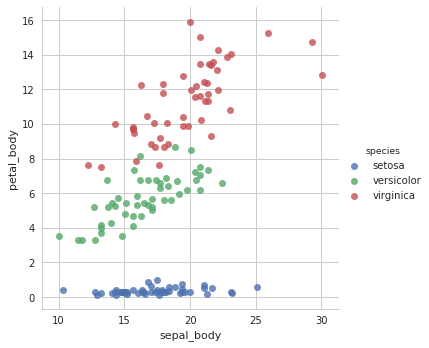

In [11]:
# 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
sns.lmplot(x = 'sepal_body', y = 'petal_body', hue = 'species', data = iris, fit_reg = False)

### 3.餐厅小费情况分析
* 载入tips数据集
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [12]:
# your code
# 载入tips数据集
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


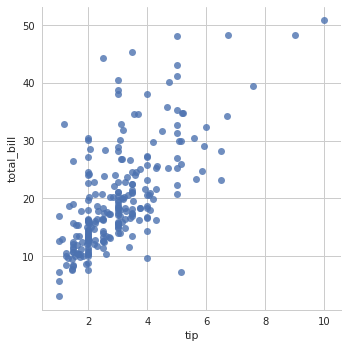

In [13]:
# 小费和总消费之间的关系（散点图）
sns.lmplot(x = 'tip', y = 'total_bill', fit_reg = False, data = tips)

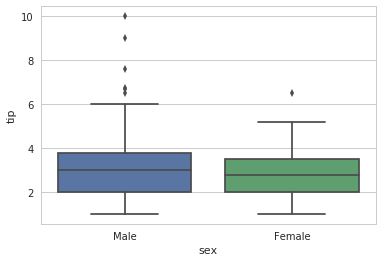

In [14]:
# 男性顾客和女性顾客，谁更慷慨（分类箱式图）
sns.boxplot(x = 'sex', y = 'tip', data = tips)

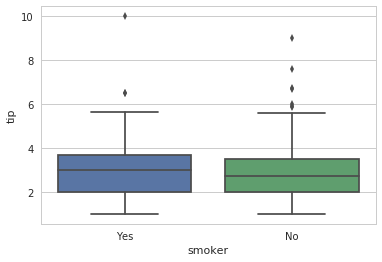

In [15]:
# 抽烟与否是否会对小费金额产生影响（分类箱式图）
sns.boxplot(x = 'smoker', y = 'tip', data = tips)

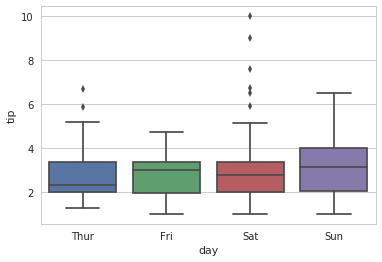

In [16]:
# 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
sns.boxplot(x = 'day', y = 'tip', data = tips)


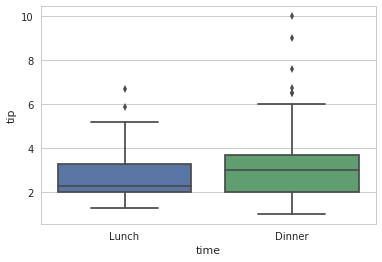

In [17]:
# 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
sns.boxplot(x="time",y="tip",data=tips)

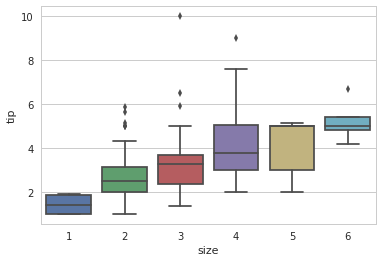

In [18]:
# 就餐人数是否会对慷慨度产生影响（分类箱式图）
sns.boxplot(x = "size",y = "tip",data = tips)

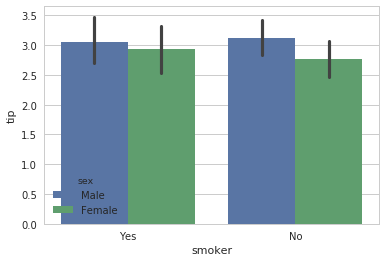

In [19]:
# 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
sns.barplot(x = 'smoker', y = 'tip', hue = 'sex', data = tips)

### 4.泰坦尼克号海难幸存状况分析



In [20]:
# your code
# * 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
titanic = sns.load_dataset('titanic')
# titanic.head()

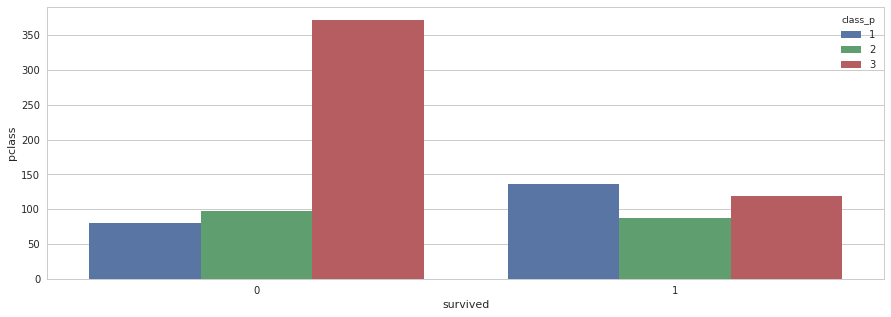

In [23]:
frame=[]
for item in range(1,4):
    temp=titanic[titanic.pclass==item].groupby("survived",as_index=False).count()
    temp["class_p"]=item
    frame.append(temp)
frame
df_class=pd.concat(frame)
# df_class.head()
fig,ax=plt.subplots(figsize=(15,5))

sns.barplot(x="survived",y="pclass",hue="class_p",data=df_class,ax=ax)

In [24]:
# * 不同性别的幸存比例（堆积柱状图）
frame=[]
for item in titanic.sex.unique():
    temp=titanic[titanic.sex==item].groupby("survived",as_index=False).count()
    temp["sex_c"]=item
    frame.append(temp)
df_sex=pd.concat(frame)
df_sex.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_c
0,0,468,468,360,468,468,468,468,468,468,468,61,468,468,468,male
1,1,109,109,93,109,109,109,109,109,109,109,45,109,109,109,male
0,0,81,81,64,81,81,81,81,81,81,81,6,81,81,81,female
1,1,233,233,197,233,233,233,231,233,233,233,91,231,233,233,female


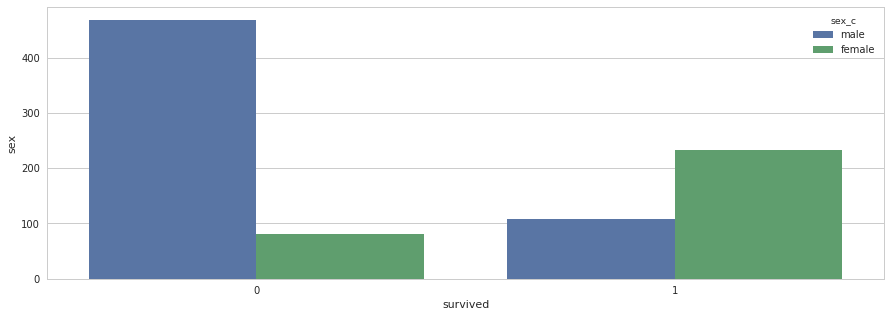

In [25]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x="survived",y="sex",hue="sex_c",data=df_sex,ax=ax)

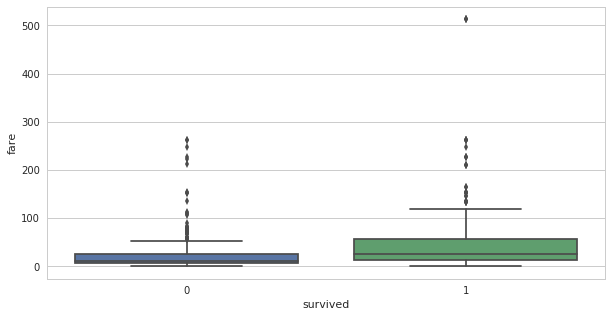

In [28]:
# * 幸存和遇难乘客的票价分布（分类箱式图）
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x = "survived",y = "fare",data = titanic,ax = ax)

In [ ]:
# * 幸存和遇难乘客的年龄分布（分类箱式图）

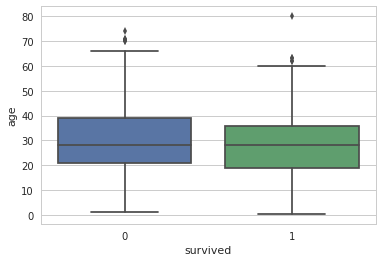

In [39]:
# fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="survived",y="age",data=titanic)

In [40]:
# * 不同上船港口的乘客仓位等级分布（分组柱状图）


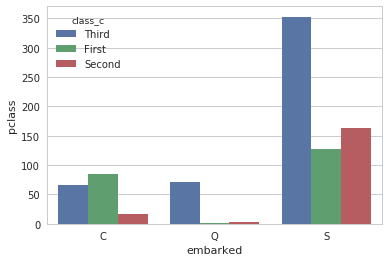

In [41]:
frame=[]
for item in titanic["class"]:
    temp=titanic[titanic["class"]==item].groupby("embarked",as_index=False).count()
    temp["class_c"]=item
    frame.append(temp)
df_embarked=pd.concat(frame)
sns.barplot(x="embarked",y="pclass",hue="class_c",data=df_embarked)

In [42]:
# * 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）


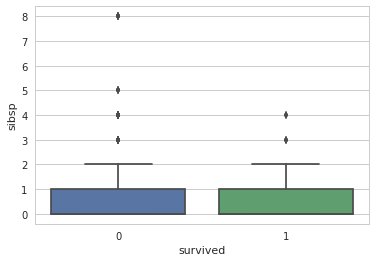

In [43]:
# fig,ax=plt.subplots(figsize=(10,2))
sns.boxplot(x="survived",y="sibsp",data=titanic)

In [44]:
# * 幸存和遇难乘客父母子女的数量分布（分类箱式图）


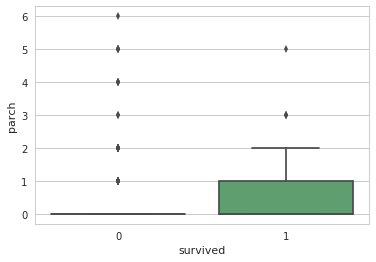

In [45]:
# fig,ax=plt.subplots(figsize=(10,3))
sns.boxplot(x="survived",y="parch",data=titanic)

In [46]:
# * 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

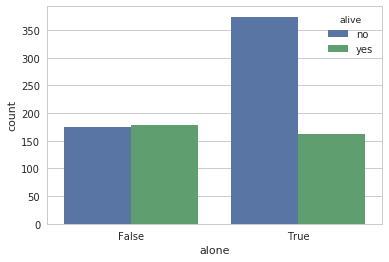

In [47]:
sns.countplot(x = 'alone', hue = 'alive', data = titanic)

### 本阶段课程意见反馈题(10分送分项，非必答)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


了解了matplotlib 和seaborn库的使用,但应用的前提是熟练掌握pandas,numpy的用法,应用这些工具将所要表达的意思转化为代码,再通过代码展现出来

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

难易适中,需要结合以往课程所学的内容,反复巩固熟练

<hr>
<center><h1>####答卷结束####</h1></center>